# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [110]:
# TODO: RA & Name
print('210184: ' + 'Alan Edward da Silva Oliveira')

210184: Alan Edward da Silva Oliveira


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

# AC1

## Importações

In [202]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


## Funções

In [141]:
def replace_null_values(data):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            data[column] = data[column].fillna(data[column].mean())
    return data

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": round(mae, 2), "MSE": round(mse, 2), "RMSE": round(rmse, 2) ,"R²": round(r2, 2)}

Importar datasets

In [193]:
dataset_train = pd.read_csv('datasets/data-train - train.csv')
dataset_test = pd.read_csv('datasets/data-test - test.csv')

## Análise Exploratória

### Treino

Cinco Primeiras Linhas

In [151]:
dataset_train.head(n=5)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,164,73,799,767,1362,117,0,169,165,171,...,218,225,179,1952,1449,617,311,271,2341,692
1,224,81,1008,2104,1710,70,0,119,115,119,...,296,167,102,1558,1122,1892,1981,2025,2061,420
2,508,296,187,2251,2313,60,835,154,154,153,...,356,142,86,1919,1295,1320,1018,1905,1824,539
3,38,17,937,1049,321,97,0,185,177,203,...,284,174,111,1845,1667,0,0,1756,1225,880
4,477,223,894,1477,2164,122,0,157,159,154,...,256,230,153,1984,1131,2028,625,586,2178,498


Distribuição das Classes

In [4]:
dataset_train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,...,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,...,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,...,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,...,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,...,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,...,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


Verificar valores nulos

In [144]:
dataset_train.isnull().sum()

avganncount                0
avgdeathsperyear           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
target_deathrate           0
dtype: int64

Verificar valores NaN

In [143]:
dataset_train.isna().sum()

avganncount                0
avgdeathsperyear           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
target_deathrate           0
dtype: int64

Histogramas

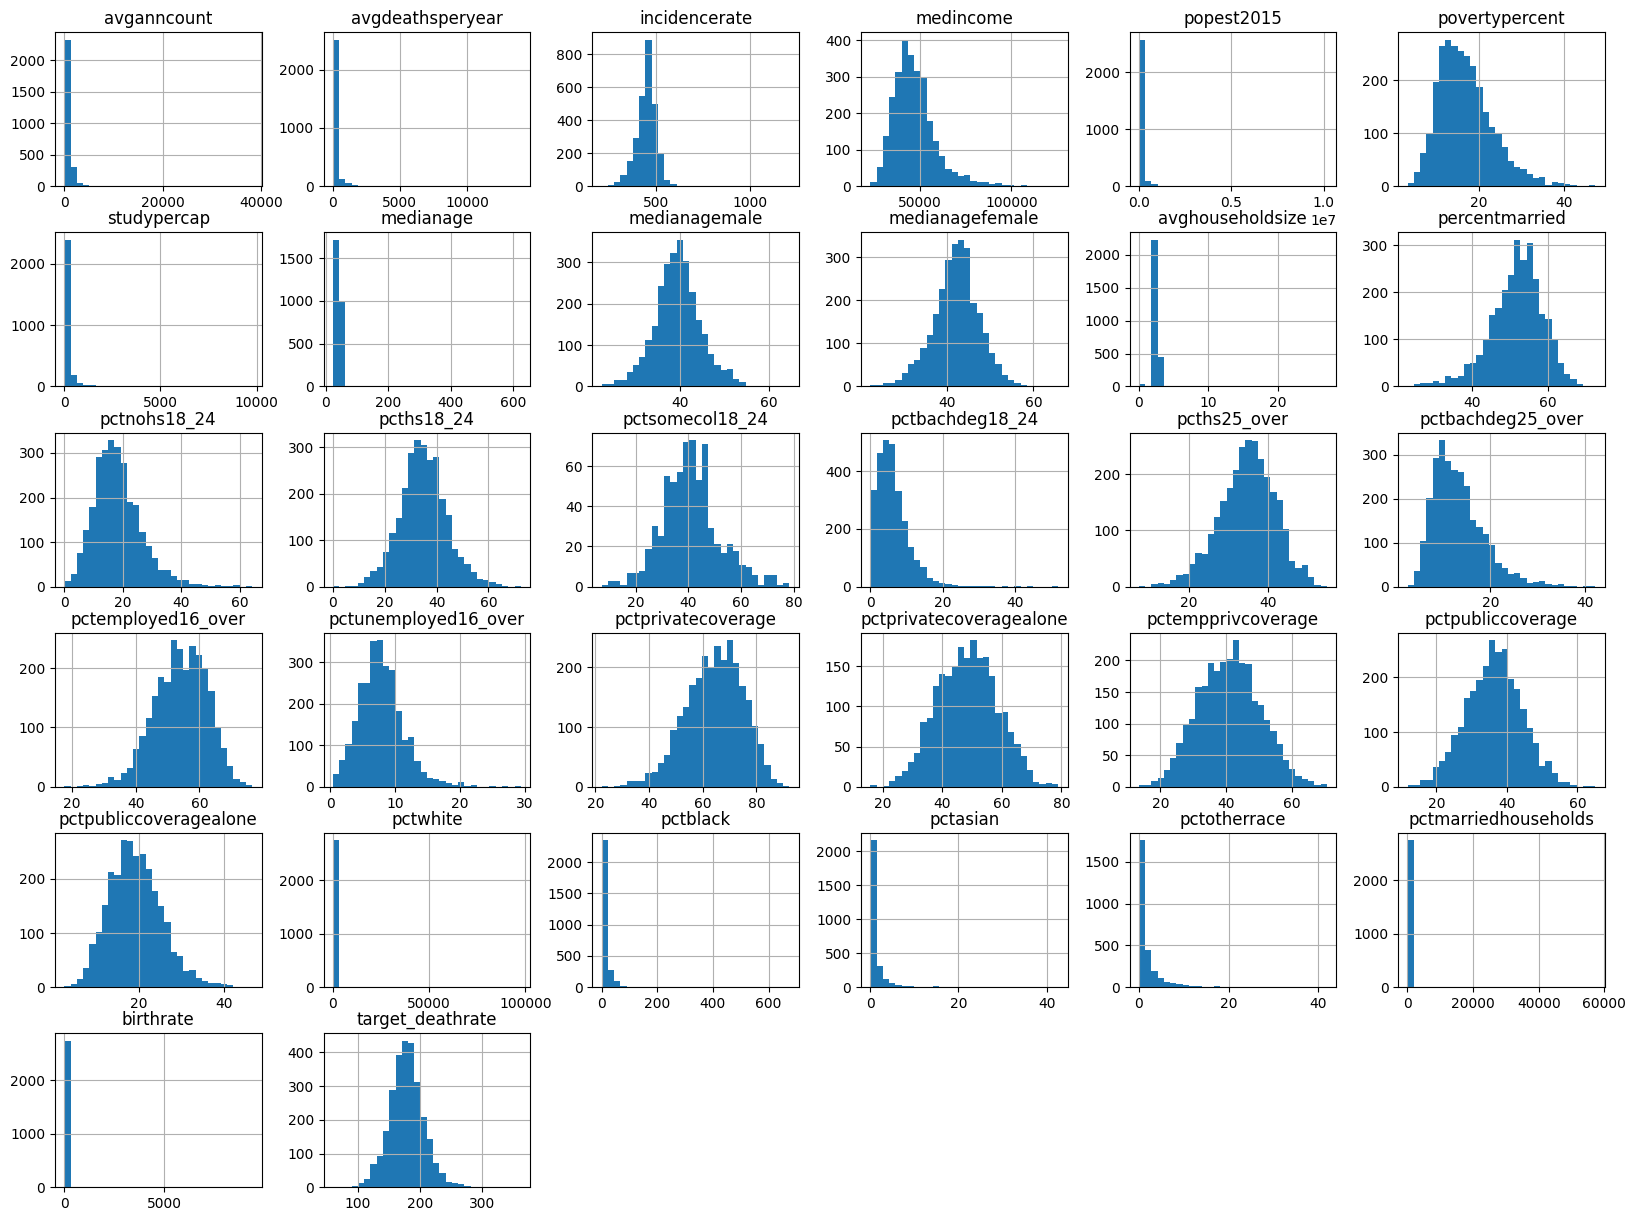

In [118]:
dataset_train.hist(bins=30, figsize=(20,15))
plt.show()

Tipos de Dados

In [119]:
dataset_train.dtypes

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

## Limpeza dos Dados

Remover colunas desnecessárias

In [194]:
columns_to_remove = [
    'binnedinc', # Já temos medianIncome, então essa versão agrupada não é necessária
    'geography', # Não impacta na mortalidade
]

dataset_train = dataset_train.drop(columns=columns_to_remove)
dataset_test = dataset_test.drop(columns=columns_to_remove)

Visualizar correlação entre as variáveis

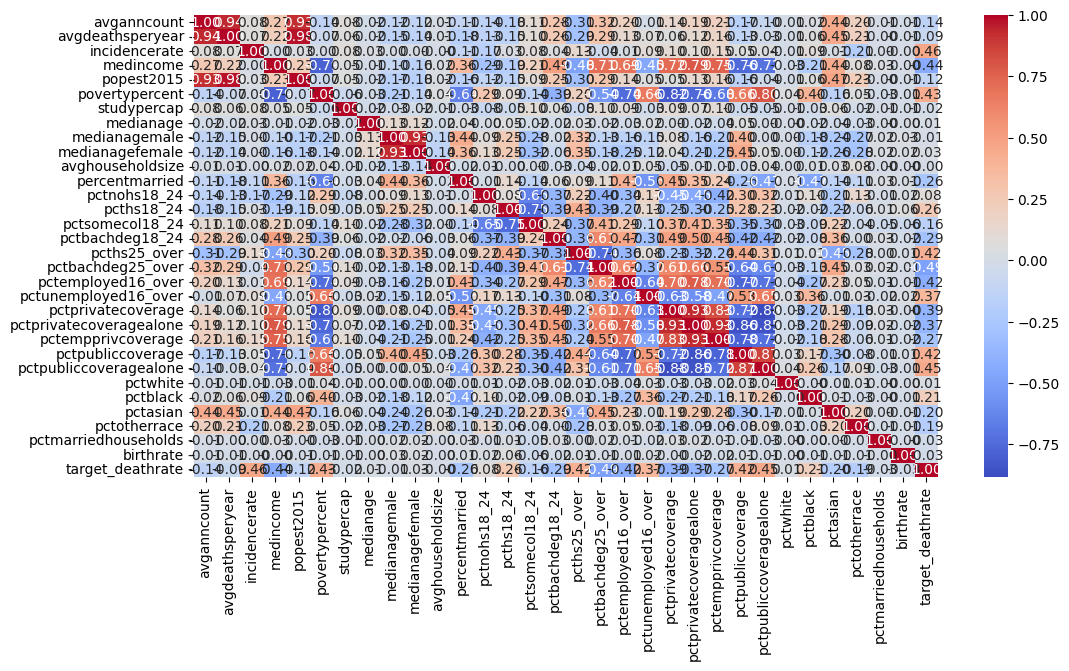

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Remover valores nulos

In [195]:
dataset_train = replace_null_values(dataset_train)
dataset_test = replace_null_values(dataset_test)

Remover Outliers

In [196]:
from scipy import stats

z_scores = np.abs(stats.zscore(dataset_train.select_dtypes(include=[np.number])))
dataset_train = dataset_train[(z_scores < 3).all(axis=1)]

Identificar correlações com a variável alvo

In [197]:
correlations = dataset_train.corr()["target_deathrate"].sort_values(ascending=False)

correlations

target_deathrate           1.000000
pctpubliccoveragealone     0.421779
povertypercent             0.417555
incidencerate              0.396142
pcths25_over               0.370035
pctunemployed16_over       0.367403
pctpubliccoverage          0.363259
pcths18_24                 0.244204
pctblack                   0.228733
pctnohs18_24               0.042598
medianagefemale           -0.001340
medianage                 -0.011047
medianagemale             -0.022370
avghouseholdsize          -0.033832
avgdeathsperyear          -0.037184
studypercap               -0.051761
pctsomecol18_24           -0.062050
popest2015                -0.092204
birthrate                 -0.111258
pctasian                  -0.138391
avganncount               -0.163374
pctotherrace              -0.176036
pctwhite                  -0.190780
pctbachdeg18_24           -0.231278
pctempprivcoverage        -0.243498
percentmarried            -0.281594
pctmarriedhouseholds      -0.298744
pctprivatecoveragealone   -0

Remover valores que possuem correlação baixa com a variável alvo

In [198]:
low_correlation_columns = correlations[abs(correlations) < 0.1].index

dataset_train = dataset_train.drop(columns=low_correlation_columns)
dataset_test = dataset_test.drop(columns=low_correlation_columns)

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

Seperação dos dados

In [199]:
X_train = dataset_train.drop(columns=["target_deathrate"])
y_train = dataset_train["target_deathrate"]

X_test = dataset_test.drop(columns=["target_deathrate"])
y_test = dataset_test["target_deathrate"]

Normalização dos dados

In [200]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

Remover colunas que não possuem importância

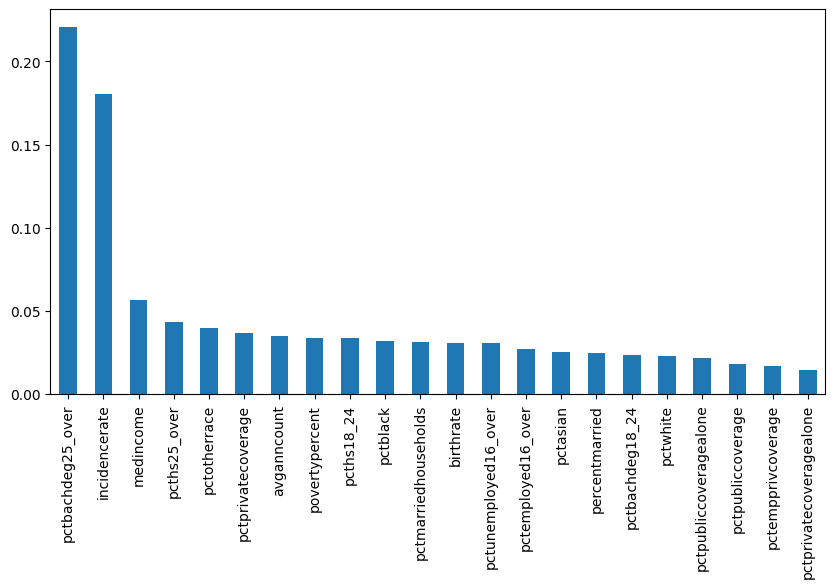

In [201]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
importance = pd.Series(model.feature_importances_, index=X_train_scaled_df.columns)

# Visualizar importância das features
importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.show()


In [203]:
dataset_train = dataset_train.drop(columns=importance [importance < 0.05].index)

Implementação do modelo de Regressão Linear

In [204]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

Implementação do modelo de Regressão Linear com SGD

In [205]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

Comparação entre os modelos

In [206]:
results_linear = evaluate_model(linear_reg, X_test_scaled, y_test)
results_sgd = evaluate_model(sgd_regressor, X_test_scaled, y_test)

print(results_linear)
print(results_sgd)

{'MAE': 15.54, 'MSE': 464.29, 'RMSE': 21.55, 'R²': 0.4}
{'MAE': 15.55, 'MSE': 465.46, 'RMSE': 21.57, 'R²': 0.4}


## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




Na Atividade 1, fiz a implementação e comparativo entre dois modelos de regressão linear com o intuito de prever as taxas de mortalidade por câncer nos EUA. O primeiro modelo utilizei a classe *LinearRegression* do *scikit-learn*, e para o segundo modelo utilizei a classe *SGDRegressor* também do *scikit-learn* que utiliza o Gradiente Descendente Estocástico para otimização. Ambos os modelos foram treinados com os dados de treino normalizados e avaliados com as métricas de Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE, Erro Quadrático Médio da Raiz (RMSE), e Coeficiente de Determinação (R²). Os resultados obtidos foram muito próximos, com o modelo de Regressão Linear apresentando um R² de 0.4 e o modelo de Regressão Linear com SGD também apresentando um R² de 0.4. Portanto, ambos os modelos apresentaram um desempenho semelhante, com o modelo de Regressão Linear sendo um pouco superior.

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


Implementação do modelo de Regressão Linear Polinomial

## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [104]:
# seu codigo

In [105]:
# Linear Model with SDGRegressor


In [106]:
# Polynomial model with SDGRegressor


## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.